In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Variables de estado
- $G$: Concentración de glucosa en sangre (en mg/dL)
- $X$: Efectividad de la insulina, que refleja cómo la insulina facilita la captación de glucosa por los tejidos.
- $I$: Concentración de insulina en sangre (en $\mu$U/mL)

## Parámetros
- $k_1$: Tasa de eliminación de la glucosa independiente de la insulina.
- $G_b$: Nivel basal de glucosa (concentración de glucosa en ayuno).
- $p_2$: Tasa de decaimiento de la efectividad de la insulina.
- $p_3$: Tasa de aumento de la efectividad de la insulina en respuesta a la insulina.
- $I_b$: NIvel basal de insulina (concentración de insulina en ayuno).
- $k_i$: TAsa de eliminación de la insulina.
- $a$ y $b$: Parámetros que controlan la secreción de insulina en respuesta a los niveles de glucosa.
- $h$: Umbral de glucosa activa la secreción de insulina.

## Ecuación para la Glucosa $\left(G\right)$
$$
\frac{dG}{dt} = -k_1\left(G - G_b\right) - X \cdot G
$$

## Ecuación para la Efectividad de la Insulina $\left(X\right)$
$$
\frac{dX}{dt} = -p_2X+p_3\left(I - I_b\right)
$$

## Ecuación para la Insulina $\left(I\right)$:
$$
\frac{dI}{dt} = -k_1(I - I_b) + S(G)
$$

## Ecuación de secreción de insulina $S(G)$
$$
S(G) = a \cdot \frac{\left(G - h\right)}{1 + e^{-b\left(G-h\right)}}
$$

In [3]:
def S(G, a=0.1, b=0.001, h=80): # Ecuación de secreción de insulina
    return a * ((G - h) / (1 + math.exp(-b*(G-h))))

In [4]:
 def solution(G0, X0, I0, t, k1=0.1, p2=0.05, p3=0.0001, ki=0.1, Gb=90, Ib=10): # solución al sistema de 3 EDOs
    G = np.zeros(len(t))
    X = np.zeros(len(t))
    I = np.zeros(len(t))

    G[0] = G0
    X[0] = X0
    I[0] = I0

    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]

        dG_dt = -k1 * (G[i] - Gb) - X[i] * G[i]
        dX_dt = -p2 * X[i] + p3 * (I[i] - Ib)
        dI_dt = -ki * (I[i] - Ib) + S(G[i])

        G[i+1] = G[i] + dt * dG_dt
        X[i+1] = X[i] + dt * dX_dt
        I[i+1] = I[i] + dt * dI_dt

    return G, X, I

## Función para graficar resultados

In [11]:
def graficar(t, G, X, I, titulo):
    """Graficar la evolución de Glucosa, Efectividad de la Insulina e Insulina"""
    plt.figure(figsize=(10, 8))

    # Gráfica para Glucosa G
    plt.subplot(3, 1, 1)
    plt.plot(t, G, label='Glucosa G', color='b')
    plt.title(titulo)
    plt.ylabel('Glucosa G (mg/dL)')
    plt.legend()

    # Gráfica para Efectividad de la Insulina X
    plt.subplot(3, 1, 2)
    plt.plot(t, X, label='Efectividad Insulina X', color='g')
    plt.ylabel('Efectividad Insulina X')
    plt.legend()

    # Gráfica para Insulina I
    plt.subplot(3, 1, 3)
    plt.plot(t, I, label='Insulina I', color='r')
    plt.xlabel('Tiempo (minutos)')
    plt.ylabel('Insulina I (µU/mL)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
t = np.linspace(0, 150, 151)

## Simulación 1: Condiciones iniciales estándar

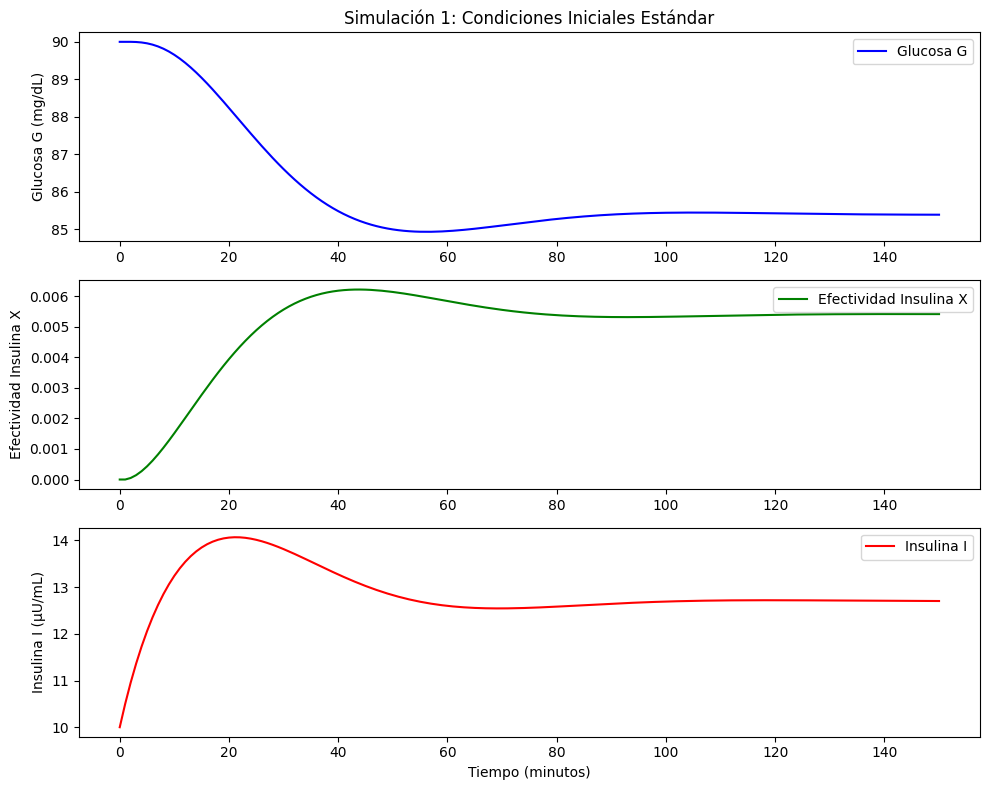

In [12]:
G0 = 90
X0 = 0
I0 = 10

G, X, I = solution(G0, X0, I0, t)
graficar(t, G, X, I, 'Simulación 1: Condiciones Iniciales Estándar')

## Conclusión 1:
Con las condiciones inciales estándar, la glucosa tiende a estabilizarse en valores cercanos a su valor basal \(G_b\), mientras que la insulina y la efectividad de la insulina se ajustan suavemente a lo largo del tiempo.

## Simulación 2: Modificar el valor de $p_3$

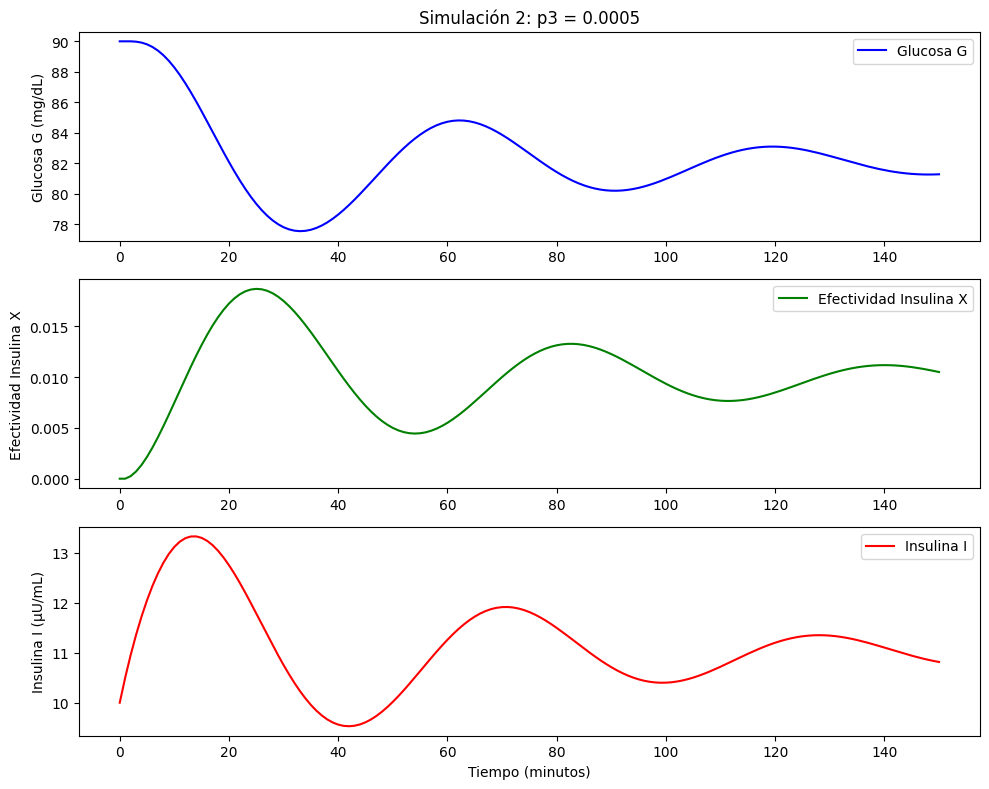

In [14]:
p3 = 0.0005
G, X, I = solution(G0, X0, I0, t, p3=p3)
graficar(t, G, X, I, 'Simulación 2: p3 = 0.0005')

## Conclusión 2
Al incrementar el valor de \( p_3 \), la secreción de insulina es más sensible a los cambios en los niveles de glucosa, lo que resulta en una reducción más pronunciada de la glucosa en comparación con la simulación estándar. La insulina también alcanza un pico más alto.

## Somulación 3: Modificar la condición inicial de G(0)

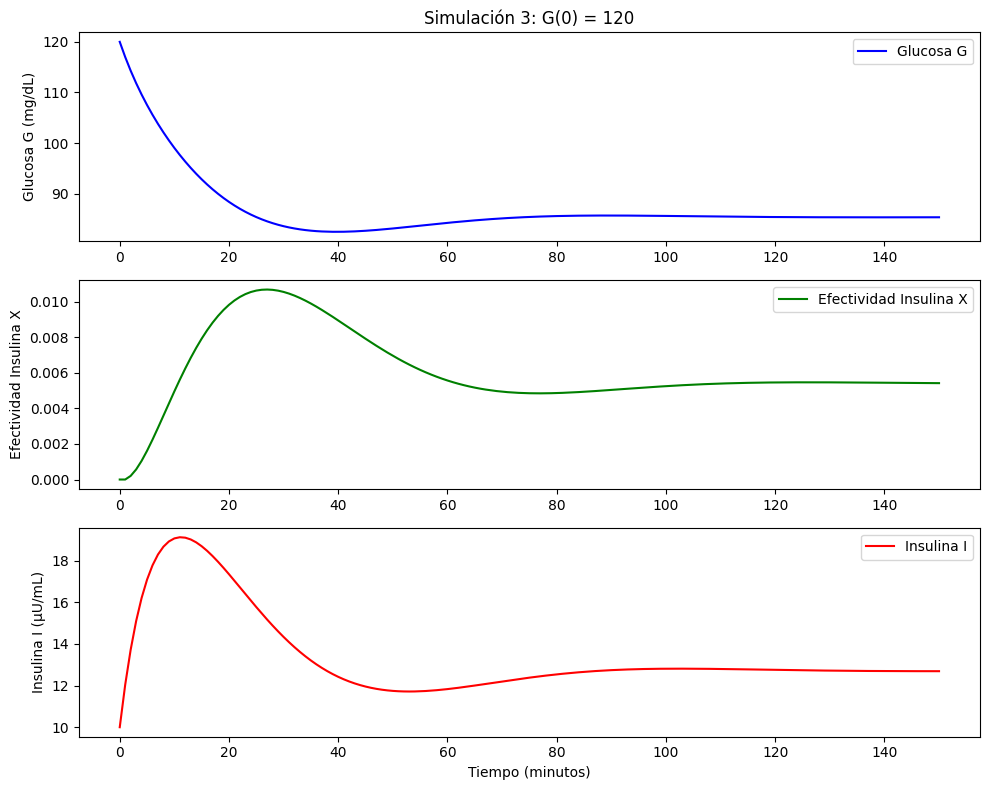

In [17]:
G0 = 120

G, X, I = solution(G0, X0, I0, t)
graficar(t, G, X, I, 'Simulación 3: G(0) = 120')

## Conclusion 3
Con una glucosa inicial elevada, se observa una respuesta más pronunciada en los niveles de insulina, que busca compensar el exceso de glucosa, aunque eventualmente tiende a estabilizarse. La efectividad de la insulina también muestra un cambio más abrupto en los primeros minutos.